In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
os.chdir('/Users/orshahar/Downloads')
data = pd.read_excel('elec_prices.xlsx')

In [4]:
data['date'] = data['Month'].astype(str) + '-' + data['Year'].astype(str)
data['date'] = pd.to_datetime(data['date'], format='%m-%Y')
data = data.drop(columns=['Year', 'Month'])
data = data.set_index('date')

data.index = pd.to_datetime(data.index)
data.index.name = None

In [5]:
data

,State,residential price,commercial price,industrial price,total price
2009-12-01,AK,16.27,14.06,13.42,14.76
2009-12-01,AL,9.82,9.91,6.49,8.66
2009-12-01,AR,8.64,7.58,5.9,7.41
2009-12-01,AZ,9.70,8.61,6.12,8.65
2009-12-01,CA,14.73,11.31,9.3,12.21
...,...,...,...,...,...
1990-01-01,VT,9.31,9.37,7.85,8.97
1990-01-01,WA,4.40,4.19,2.54,3.60
1990-01-01,WI,6.44,5.73,4.09,5.45
1990-01-01,WV,5.51,5.16,3.47,4.65


In [6]:
list_states = data['State'].unique()
state_dict_res , state_dict_com, state_dict_ind = {},{},{}
for state in list_states:
    state_dict_res[state] = np.array(data.loc[data['State'] == state, 'residential price'])
    state_dict_com[state] = np.array(data.loc[data['State'] == state, 'commercial price'])
    state_dict_ind[state] = np.array(data.loc[data['State'] == state, 'industrial price'])


In [7]:
data_residential = pd.DataFrame(state_dict_res , index=data.index.unique()).sort_index()
data_commercial = pd.DataFrame(state_dict_com , index=data.index.unique()).sort_index()
data_industrial = pd.DataFrame(state_dict_ind , index=data.index.unique()).sort_index()

In [8]:
data_residential

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
1990-01-01,9.62,5.96,7.06,7.83,9.68,6.81,9.42,5.62,7.36,7.68,...,6.39,5.68,6.26,7.02,6.35,9.31,4.40,6.44,5.51,5.63
1990-02-01,9.47,7.00,7.72,7.85,9.90,6.47,9.96,5.58,7.87,7.84,...,6.55,5.68,6.40,6.96,6.02,9.53,4.39,6.38,5.81,5.70
1990-03-01,9.55,6.18,7.85,8.18,9.97,6.75,9.70,5.34,7.89,7.79,...,6.60,5.69,6.84,7.08,6.83,9.47,4.42,6.57,5.78,5.83
1990-04-01,10.27,6.93,7.93,8.97,9.68,7.06,9.65,5.29,8.17,7.90,...,6.88,5.71,7.05,7.24,6.97,8.56,4.31,6.73,5.87,5.98
1990-05-01,10.27,6.52,8.43,9.37,9.97,7.27,10.04,5.26,8.58,7.83,...,7.24,5.73,7.63,7.30,7.79,8.89,4.31,6.68,6.00,6.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-08-01,17.09,10.91,9.43,11.29,15.93,10.40,20.22,14.72,14.31,12.25,...,9.25,9.20,12.15,9.20,10.91,15.07,7.86,12.28,7.94,9.26
2009-09-01,17.34,10.85,9.32,11.17,15.53,10.67,20.32,14.79,14.40,12.34,...,9.31,9.16,12.05,8.85,11.11,15.20,7.83,12.39,7.98,9.22
2009-10-01,16.85,10.40,9.29,10.97,13.85,10.51,20.57,14.28,14.70,12.34,...,9.01,9.25,11.97,8.35,10.84,15.37,7.73,12.00,8.30,8.98
2009-11-01,16.70,10.20,9.10,9.86,13.56,10.39,20.48,12.99,14.50,12.49,...,8.49,8.87,12.08,7.99,10.51,14.91,7.73,11.79,8.39,8.56


In [35]:
lib_states = ['CA' , 'OR' , 'NV', 'AZ', 'NM', 'MT', 'TX', 'OK', 'AR' , 'IL', 'MI', 'OH', 'VA', 'MD', 'DE', 'NJ', 'NY', 'CT', 'MA', 'NH' , 'ME']
unlib_states = ['FL', 'GA', 'AL', 'MS', 'LA', 'SC', 'NC', 'TN', 'KY', 'UT', 'CO', 'KS', 'MO', 'ID', 'WY', 'ND', 'SD', 'NE', 'WA']

data_res_lib = data_residential[lib_states].loc['1994-01-01': '2002-01-01']
data_res_unlib = data_residential[unlib_states].loc['1994-01-01': '2002-01-01']


In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
res_lib = scaler.fit_transform(data_res_lib)
res_unlib = scaler.fit_transform(data_res_unlib)
lib_mean = np.mean(res_lib, axis=1)
unlib_mean = np.mean(res_unlib, axis=1)
unlib_mean = unlib_mean + 3



In [81]:
dates = data_res_lib.index.date

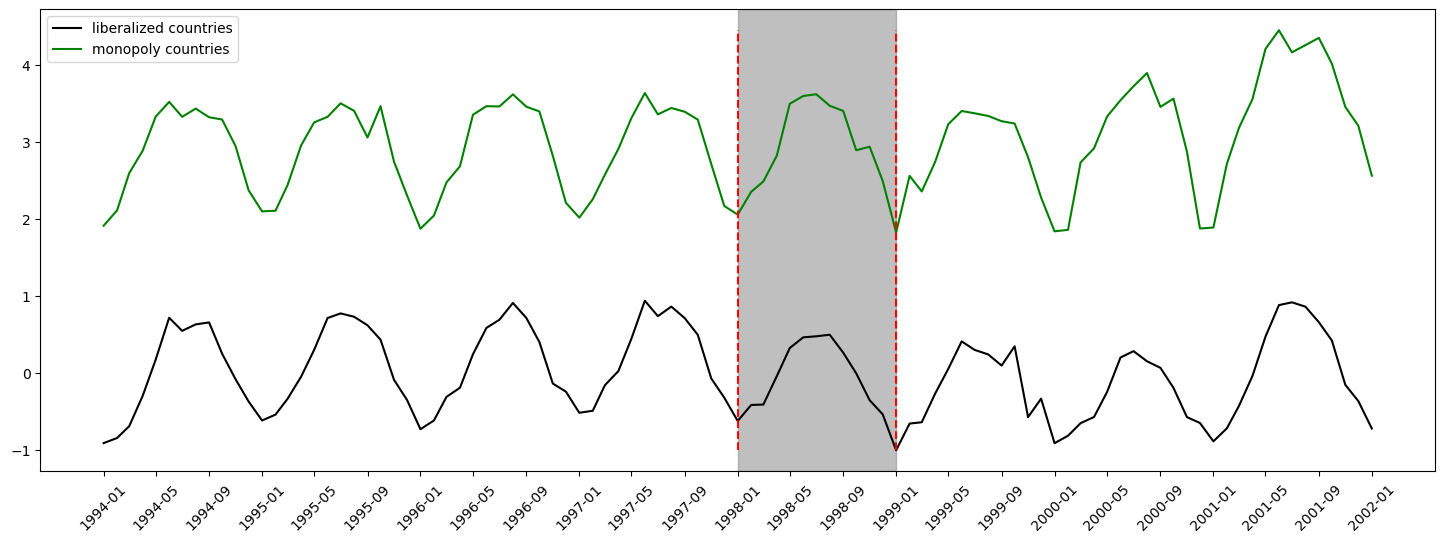

In [110]:
import datetime
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(18,6))

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

ax.plot(dates, lib_mean , color = 'black', label = 'liberalized countries')
ax.plot(dates , unlib_mean , color = 'green' , label = 'monopoly countries')
ax.set_xticks(dates[::4])
plt.xticks(rotation=45)

ax.vlines(x=datetime.datetime(1999,1,1), ymin = np.min(lib_mean), ymax = np.max(unlib_mean) , color='red', linestyle='--')
ax.vlines(x=datetime.datetime(1998,1,1), ymin = np.min(lib_mean), ymax = np.max(unlib_mean) , color='red', linestyle='--')
ax.axvspan(datetime.datetime(1998,1,1), datetime.datetime(1999,1,1), color='grey', alpha=0.5)
plt.legend()
plt.show()

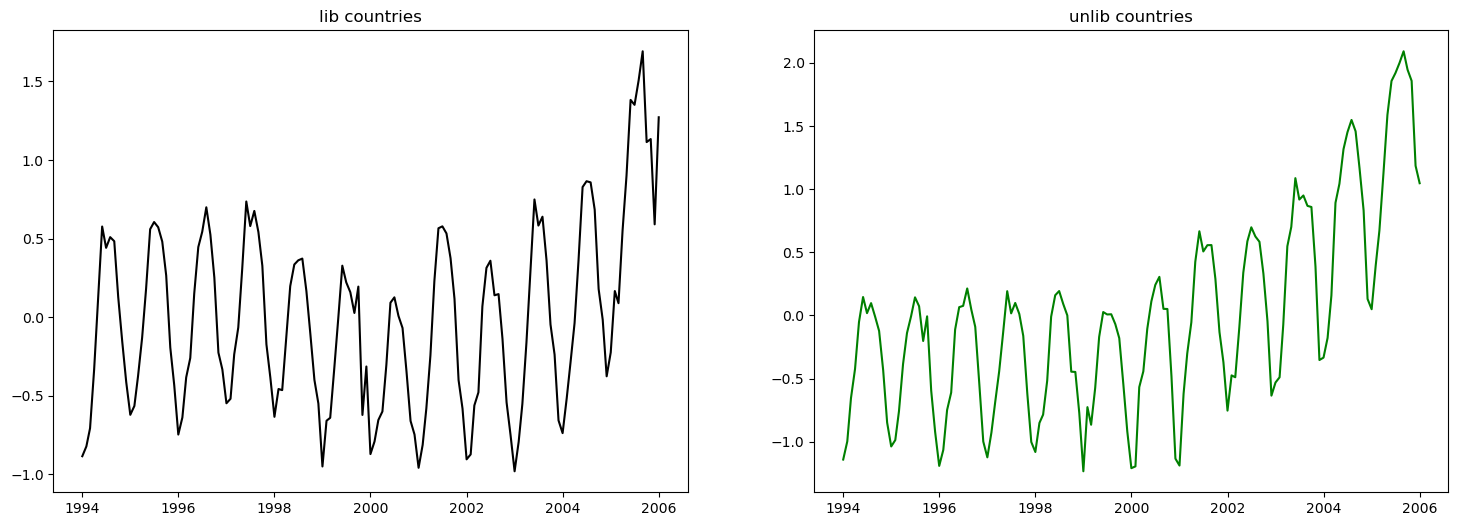

In [31]:
fig, ax = plt.subplots(1,2 ,figsize = (18,6))
ax[0].plot(data_res_lib.index , lib_mean , color = 'black', label = 'lib countries')
ax[1].plot(data_res_unlib.index , unlib_mean , color = 'green' , label = 'unlib countries')

ax[0].set_title('lib countries')
ax[1].set_title('unlib countries')

plt.show()